In [2]:
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense,Dropout,Flatten
from keras.optimizers import adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix,f1_score
import itertools
import matplotlib.pyplot as plt
import cv2
%matplotlib inline


In [3]:
mobile_net=keras.applications.MobileNet()  #from imagenet

In [4]:
import os
image_dir='random_images/'
fnames=[os.path.join(image_dir,fname) for fname in os.listdir(image_dir)]

In [5]:
fnames

['random_images/dog.jpg',
 'random_images/tomato.jpeg',
 'random_images/monkey.jpeg',
 'random_images/cat.2683.jpg',
 'random_images/hot_air_ballon.jpeg',
 'random_images/broccali.jpg',
 'random_images/cucumber.jpg',
 'random_images/Hot-Black-Tea.jpg',
 'random_images/Baby-Elephant.jpg',
 'random_images/cat.jpeg',
 'random_images/hamster.jpg',
 'random_images/koala.jpg',
 'random_images/example_5.JPG',
 'random_images/Afghan_hound_00106.jpg',
 'random_images/cat_3.jpeg',
 'random_images/hedgehog.jpeg',
 'random_images/flower.jpg',
 'random_images/dock.jpeg']

In [6]:

def preprocess_img(file_path):    
    # img=cv2.imread(file_path)
    # plt.imshow(img)
    img=image.load_img(file_path,target_size=(224,224))
    img_array=image.img_to_array(img)
    #print(img_array.shape)
    img_array_extend_dim=np.expand_dims(img_array,axis=0)  # 1 for batch
    #print(img_array_extend_dim.shape)
    plt.imshow(img)
    plt.show()
    return keras.applications.mobilenet.preprocess_input(img_array_extend_dim) #seems to return images with certain order RGB ...
# also substracting mean and std based on type of model if from caffe or tensor flow (depending on architecture)



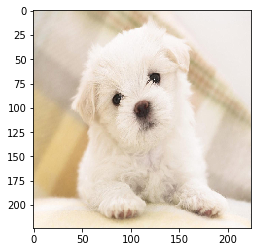

[[('n02086079', 'Pekinese', 0.5197133), ('n02085936', 'Maltese_dog', 0.2487951), ('n02098413', 'Lhasa', 0.16477162), ('n02086240', 'Shih-Tzu', 0.01384853), ('n02104029', 'kuvasz', 0.010600543)]]


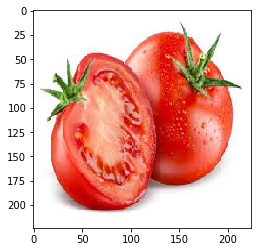

[[('n07720875', 'bell_pepper', 0.3511954), ('n07716906', 'spaghetti_squash', 0.2578227), ('n07745940', 'strawberry', 0.25162432), ('n07717556', 'butternut_squash', 0.022245584), ('n12620546', 'hip', 0.02033543)]]


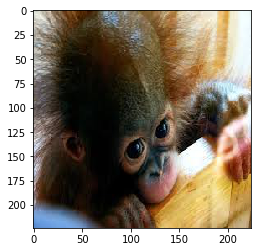

[[('n02493509', 'titi', 0.5099017), ('n02480495', 'orangutan', 0.17282149), ('n02486261', 'patas', 0.09768727), ('n02492660', 'howler_monkey', 0.049570173), ('n02493793', 'spider_monkey', 0.0420486)]]


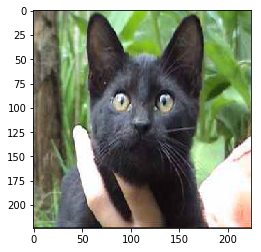

[[('n02124075', 'Egyptian_cat', 0.22798069), ('n02123597', 'Siamese_cat', 0.19836436), ('n02883205', 'bow_tie', 0.17819224), ('n03482405', 'hamper', 0.0723432), ('n02112706', 'Brabancon_griffon', 0.044224616)]]


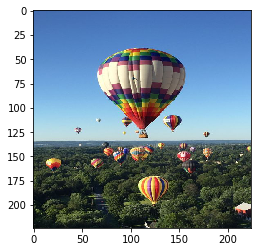

[[('n02782093', 'balloon', 0.9999962), ('n03888257', 'parachute', 3.3984772e-06), ('n04562935', 'water_tower', 1.784629e-07), ('n02692877', 'airship', 1.4246714e-07), ('n04254680', 'soccer_ball', 4.027855e-08)]]


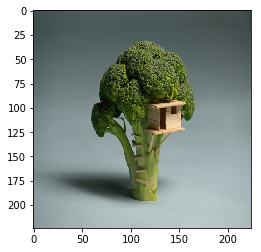

[[('n07714990', 'broccoli', 0.999281), ('n02177972', 'weevil', 0.00011122223), ('n03532672', 'hook', 9.85379e-05), ('n07754684', 'jackfruit', 9.537669e-05), ('n07714571', 'head_cabbage', 4.8617992e-05)]]


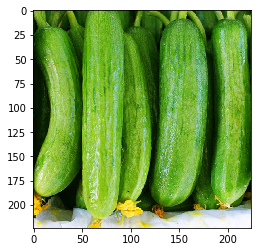

[[('n07718472', 'cucumber', 0.8336702), ('n07716358', 'zucchini', 0.165206), ('n12144580', 'corn', 0.0005447255), ('n07684084', 'French_loaf', 0.00040872127), ('n07871810', 'meat_loaf', 4.356281e-05)]]


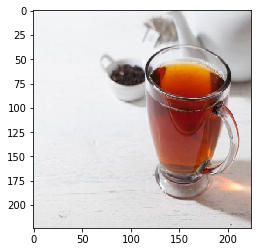

[[('n07930864', 'cup', 0.5771724), ('n07892512', 'red_wine', 0.14892074), ('n07920052', 'espresso', 0.09629444), ('n02823750', 'beer_glass', 0.021558749), ('n04376876', 'syringe', 0.020246161)]]


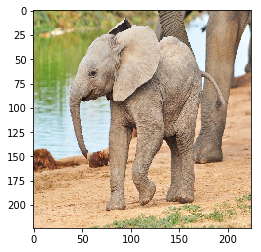

[[('n02504458', 'African_elephant', 0.59308344), ('n02504013', 'Indian_elephant', 0.30938068), ('n01871265', 'tusker', 0.09704488), ('n01704323', 'triceratops', 0.0003470109), ('n02129165', 'lion', 2.776896e-05)]]


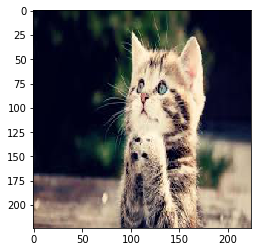

[[('n02124075', 'Egyptian_cat', 0.20268172), ('n02127052', 'lynx', 0.1681573), ('n02123045', 'tabby', 0.1639003), ('n02123159', 'tiger_cat', 0.14531471), ('n02128757', 'snow_leopard', 0.11373155)]]


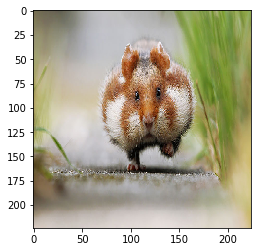

[[('n02342885', 'hamster', 0.5103548), ('n02441942', 'weasel', 0.1833166), ('n02443484', 'black-footed_ferret', 0.17080763), ('n02443114', 'polecat', 0.06189606), ('n02509815', 'lesser_panda', 0.019433934)]]


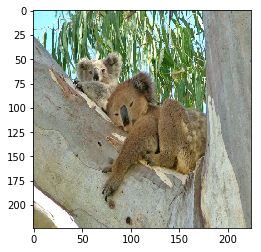

[[('n01882714', 'koala', 0.61031175), ('n02119789', 'kit_fox', 0.13802895), ('n02137549', 'mongoose', 0.10170407), ('n02094258', 'Norwich_terrier', 0.044871904), ('n02120505', 'grey_fox', 0.030513085)]]


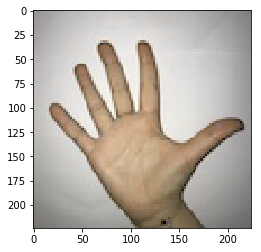

[[('n03250847', 'drumstick', 0.17658328), ('n02786058', 'Band_Aid', 0.10537332), ('n03720891', 'maraca', 0.10170318), ('n03970156', 'plunger', 0.09605401), ('n04270147', 'spatula', 0.08485852)]]


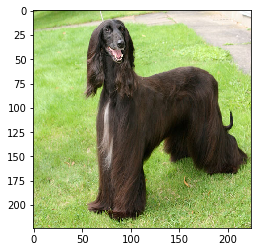

[[('n02088094', 'Afghan_hound', 0.99789125), ('n02101006', 'Gordon_setter', 0.0012768267), ('n02100877', 'Irish_setter', 0.00043321124), ('n02091831', 'Saluki', 0.00024991608), ('n02099267', 'flat-coated_retriever', 6.181734e-05)]]


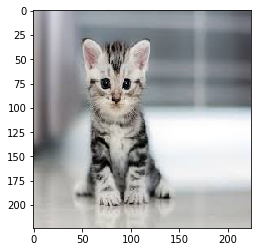

[[('n02124075', 'Egyptian_cat', 0.62941635), ('n02123045', 'tabby', 0.28841826), ('n02123159', 'tiger_cat', 0.029332321), ('n02129604', 'tiger', 0.006806606), ('n02114712', 'red_wolf', 0.004187294)]]


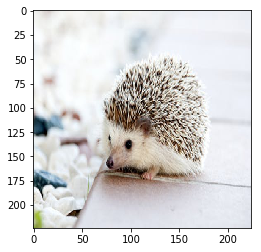

[[('n02346627', 'porcupine', 0.9991228), ('n01872401', 'echidna', 0.00038928146), ('n02138441', 'meerkat', 0.00018886982), ('n02486410', 'baboon', 0.00012608324), ('n02120079', 'Arctic_fox', 4.0579882e-05)]]


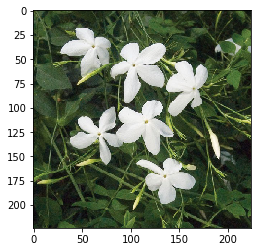

[[('n11939491', 'daisy', 0.75901884), ('n13044778', 'earthstar', 0.08493408), ('n03991062', 'pot', 0.04773375), ('n07734744', 'mushroom', 0.047323544), ('n01944390', 'snail', 0.011254453)]]


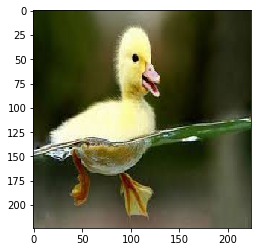

[[('n02088094', 'Afghan_hound', 0.10781472), ('n02490219', 'marmoset', 0.09698094), ('n02493509', 'titi', 0.09187077), ('n01739381', 'vine_snake', 0.07935655), ('n01530575', 'brambling', 0.057604205)]]


In [85]:

for fname in fnames:
    file_path=fname
    img_processed=preprocess_img(file_path)
    prediction=mobile_net.predict(img_processed)
    results=imagenet_utils.decode_predictions(prediction)
    print(results)

In [86]:
mobile_net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 114, 114, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
__________

In [7]:
layer_outputs=[layer.output for layer in mobile_net.layers[2:31]]

In [88]:
print(layer_outputs)

[<tf.Tensor 'conv1_1/convolution:0' shape=(?, 112, 112, 32) dtype=float32>, <tf.Tensor 'conv1_bn_1/cond/Merge:0' shape=(?, 112, 112, 32) dtype=float32>, <tf.Tensor 'conv1_relu_1/Minimum:0' shape=(?, 112, 112, 32) dtype=float32>, <tf.Tensor 'conv_pad_1_1/Pad:0' shape=(?, 114, 114, 32) dtype=float32>, <tf.Tensor 'conv_dw_1_1/depthwise:0' shape=(?, 112, 112, 32) dtype=float32>, <tf.Tensor 'conv_dw_1_bn_1/cond/Merge:0' shape=(?, 112, 112, 32) dtype=float32>, <tf.Tensor 'conv_dw_1_relu_1/Minimum:0' shape=(?, 112, 112, 32) dtype=float32>, <tf.Tensor 'conv_pw_1_1/convolution:0' shape=(?, 112, 112, 64) dtype=float32>, <tf.Tensor 'conv_pw_1_bn_1/cond/Merge:0' shape=(?, 112, 112, 64) dtype=float32>, <tf.Tensor 'conv_pw_1_relu_1/Minimum:0' shape=(?, 112, 112, 64) dtype=float32>, <tf.Tensor 'conv_pad_2_1/Pad:0' shape=(?, 114, 114, 64) dtype=float32>, <tf.Tensor 'conv_dw_2_1/depthwise:0' shape=(?, 56, 56, 64) dtype=float32>, <tf.Tensor 'conv_dw_2_bn_1/cond/Merge:0' shape=(?, 56, 56, 64) dtype=float

In [8]:
for layer in layer_outputs:
    print(layer.name) 
    

conv1/convolution:0
conv1_bn/cond/Merge:0
conv1_relu/Minimum:0
conv_pad_1/Pad:0
conv_dw_1/depthwise:0
conv_dw_1_bn/cond/Merge:0
conv_dw_1_relu/Minimum:0
conv_pw_1/convolution:0
conv_pw_1_bn/cond/Merge:0
conv_pw_1_relu/Minimum:0
conv_pad_2/Pad:0
conv_dw_2/depthwise:0
conv_dw_2_bn/cond/Merge:0
conv_dw_2_relu/Minimum:0
conv_pw_2/convolution:0
conv_pw_2_bn/cond/Merge:0
conv_pw_2_relu/Minimum:0
conv_pad_3/Pad:0
conv_dw_3/depthwise:0
conv_dw_3_bn/cond/Merge:0
conv_dw_3_relu/Minimum:0
conv_pw_3/convolution:0
conv_pw_3_bn/cond/Merge:0
conv_pw_3_relu/Minimum:0
conv_pad_4/Pad:0
conv_dw_4/depthwise:0
conv_dw_4_bn/cond/Merge:0
conv_dw_4_relu/Minimum:0
conv_pw_4/convolution:0


In [9]:
activation_model=Model(inputs=mobile_net.input,outputs=layer_outputs)

In [10]:
activation_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 114, 114, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
__________

In [92]:
mobile_net.input

<tf.Tensor 'input_2:0' shape=(?, 224, 224, 3) dtype=float32>

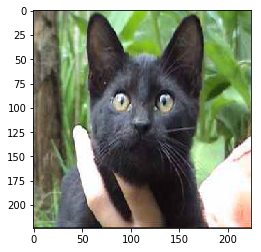

In [93]:
activations=activation_model.predict(preprocess_img(fnames[3]))

In [94]:
activations[0].shape

(1, 112, 112, 32)

In [28]:
first_layer_activation=activations[0]  #layer conv1 (Conv2D)  

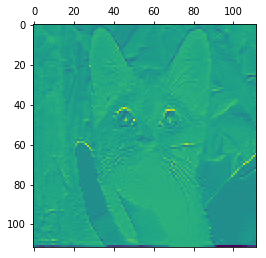

In [32]:
plt.matshow(first_layer_activation[0,:,:,2],cmap='viridis')

In [45]:
def visualize(img,ax):
    #img=cv2.imread(path)
    #mg=image.load_img(img)
    ax.imshow((img/2.0)+0.5,vmin=0.0,vmax=1.0) #images are -1 and 1 limit from generator for mobile net, need to
def plot_image_matrix(imgs,labels):         # make it between 0 and 1 and clip to make sure no issue for plotting

    plt.figure(figsize=(20,15))
    for i in range(len(labels)):
        ax=plt.subplot(8,len(labels)//8,i+1,xticks=[],yticks=[])
        visualize(imgs[i],ax)
        ax.set_title(labels[i])  

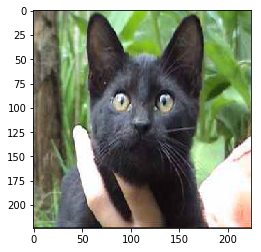

In [37]:
plt.imshow(image.load_img(fnames[3],target_size=(224,224)))

In [42]:
photo_path=fnames[3]
photo_label=str(photo_path.split('/')[1].split('.')[0])
photo_label

'cat'

In [97]:
photo_path=fnames[3]

activation_layer=activations[0]
txt='activation0'
def plot_activation_matrix(photo_path,activation_layer,txt):
    
    activation_layer_name=str('_'+str(txt)+'_')
    photo_label=str(photo_path.split('/')[1].split('.')[0])
    activation_layer_size=activation_layer.shape[3]
    print(activation_layer_size)

    #plt.imshow(image.load_img(photo_path,target_size=(224,224)))
    #plt.show()

    plt.figure(figsize=(20,15))
    for i in range(32): #activation_layer_size


        ax=plt.subplot(4,8,i+1,xticks=[],yticks=[])  # just up to 32 filter for each layer,activation_layer_size//8
        #visualize(imgs[i],ax)
        ax.matshow(activation_layer[0,:,:,i],cmap='viridis')
        label=activation_layer_name+str(i)
        #print(label)
        position_=ax.set_title(label) 
        position_.set_position([0.5,1.2])
        #print(i)
    plt.show()

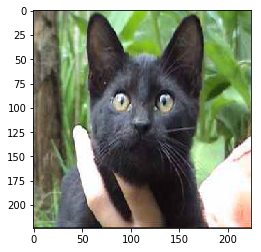

32


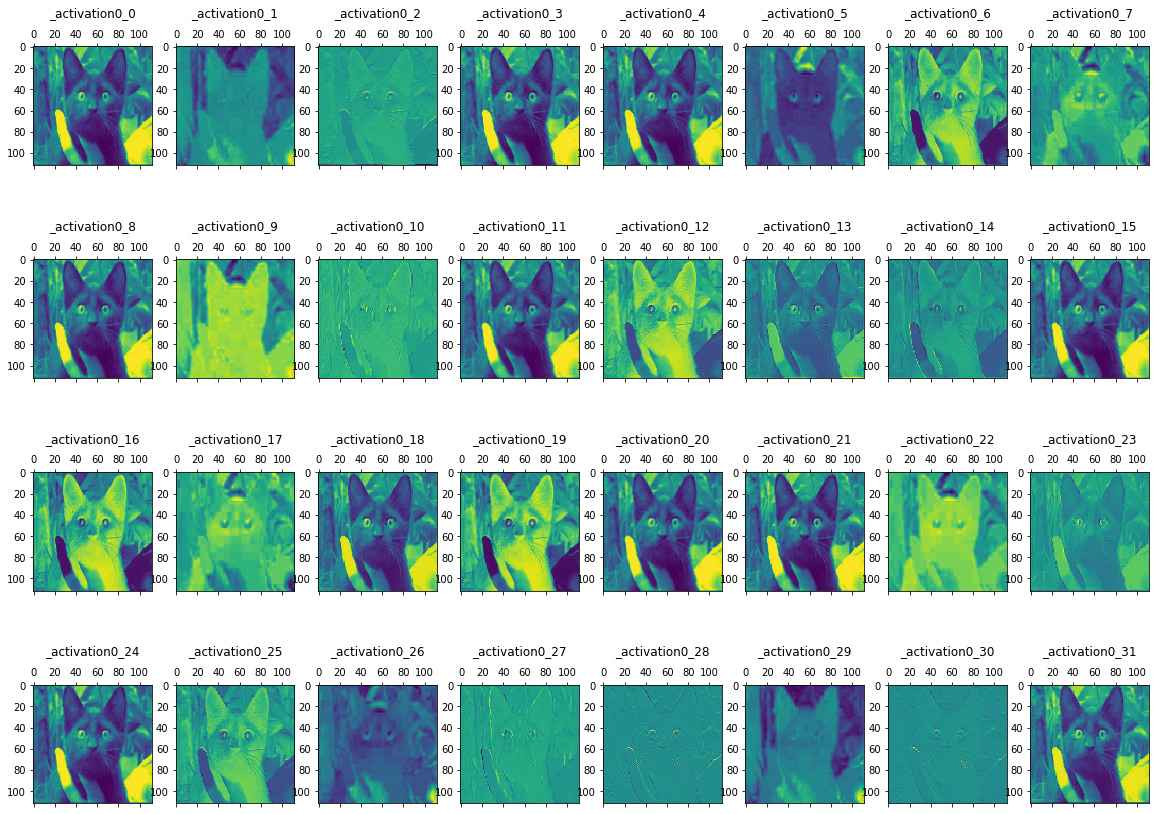

In [98]:
photo_path=fnames[3]
layer_count=0
activations=activation_model.predict(preprocess_img(photo_path))
activation_layer=activations[layer_count]
txt='activation'+str(layer_count)
plot_activation_matrix(photo_path,activation_layer,txt)

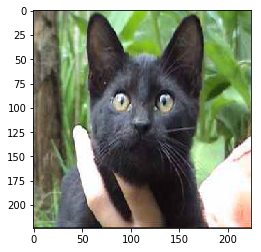

32


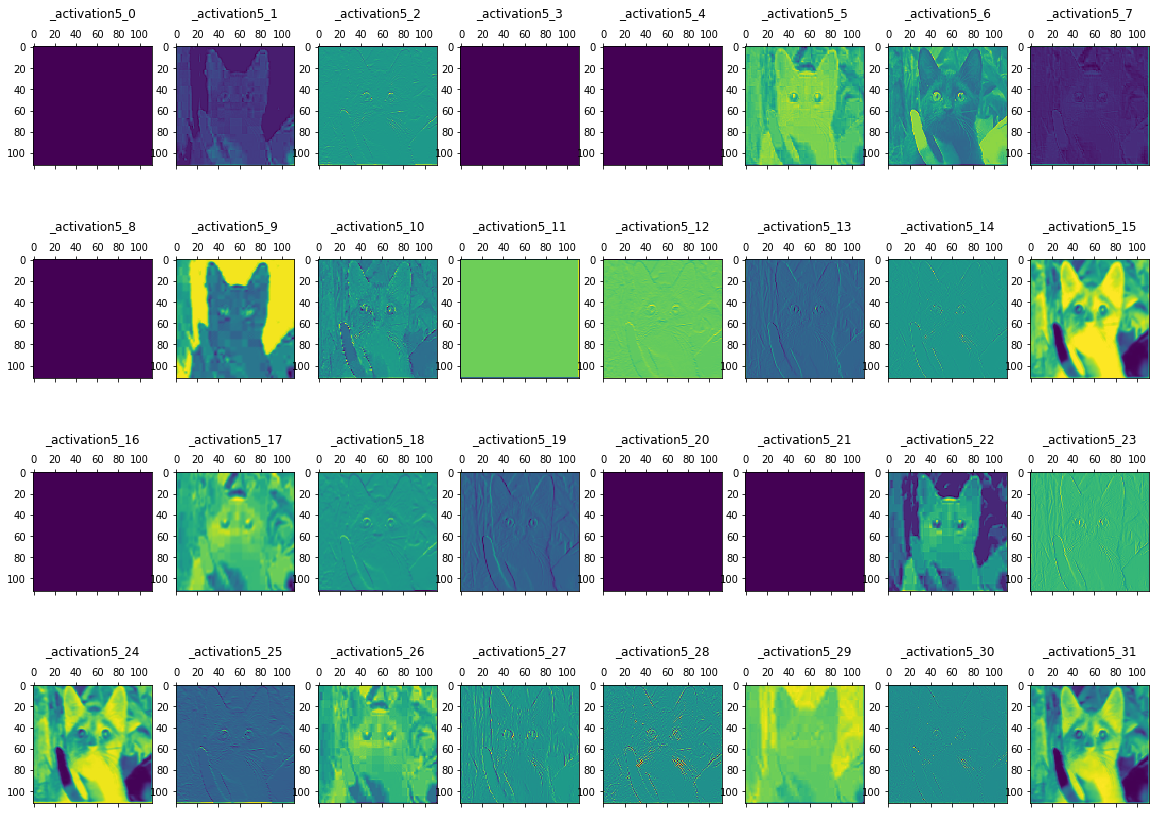

In [107]:
photo_path=fnames[3]
layer_count=5
activations=activation_model.predict(preprocess_img(photo_path))
activation_layer=activations[layer_count]
txt='activation'+str(layer_count)
plot_activation_matrix(photo_path,activation_layer,txt)

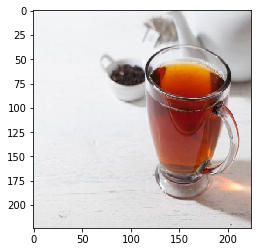

32


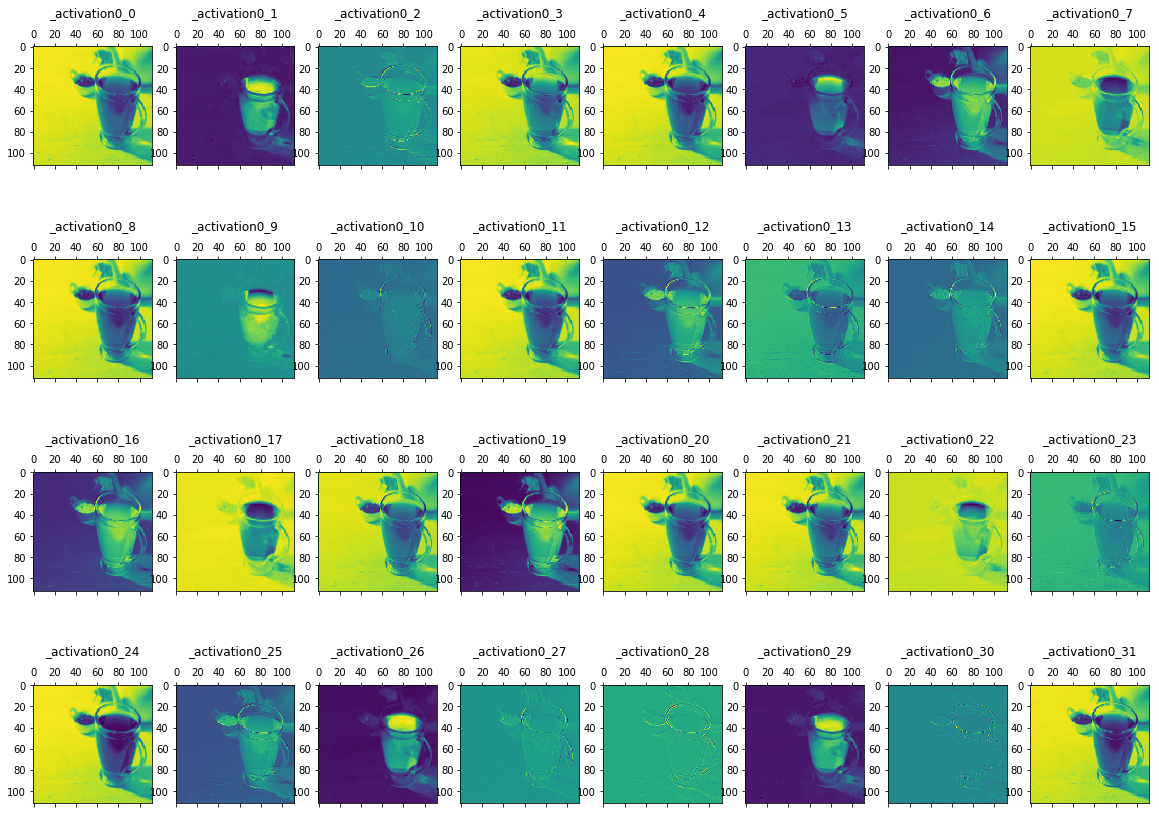

In [69]:
photo_path=fnames[3]
layer_count=0
activations=activation_model.predict(preprocess_img(photo_path))
activation_layer=activations[layer_count]
txt='activation'+str(layer_count)
plot_activation_matrix(photo_path,activation_layer,txt)

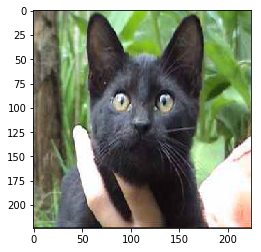

32


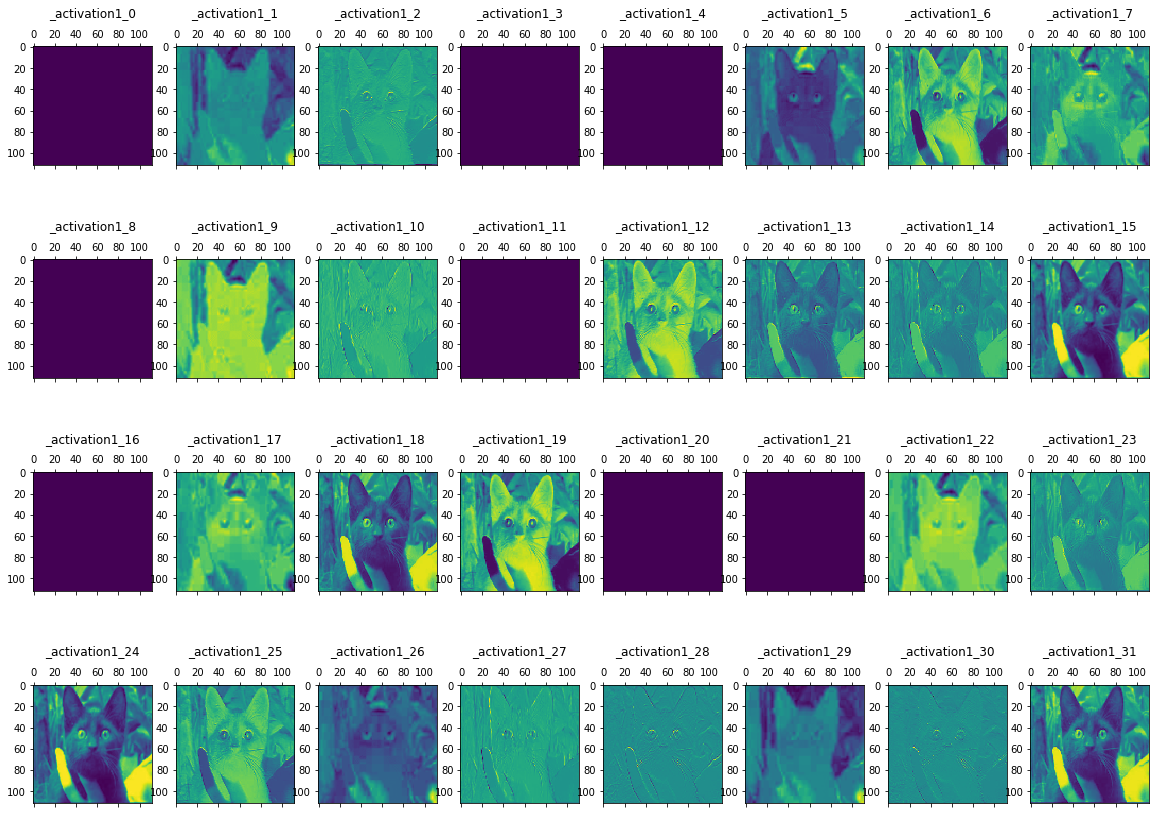

In [70]:
photo_path=fnames[3]
layer_count=1
activations=activation_model.predict(preprocess_img(photo_path))
activation_layer=activations[layer_count]
txt='activation'+str(layer_count)
plot_activation_matrix(photo_path,activation_layer,txt)

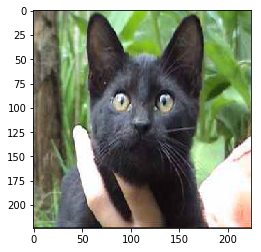

32


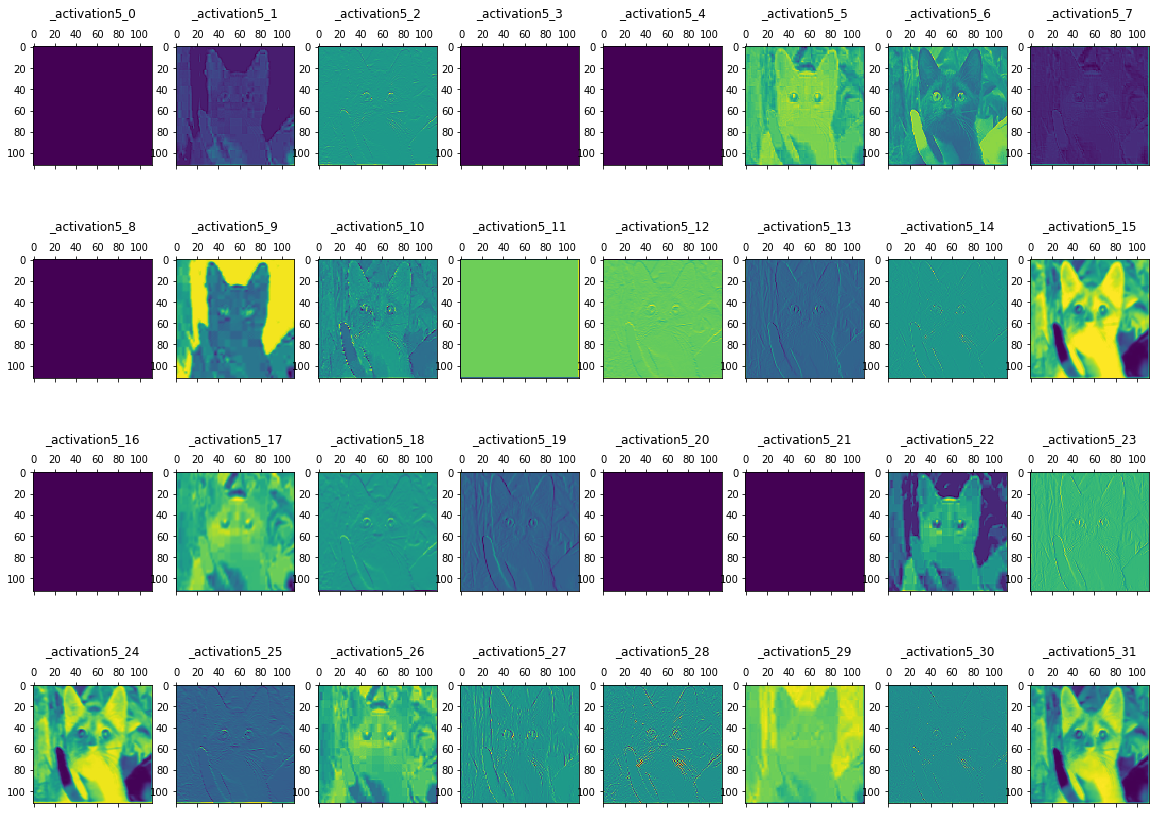

In [109]:
photo_path=fnames[3]
layer_count=5
activations=activation_model.predict(preprocess_img(photo_path))
activation_layer=activations[layer_count]
txt='activation'+str(layer_count)
plot_activation_matrix(photo_path,activation_layer,txt)

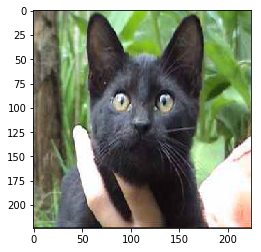

128


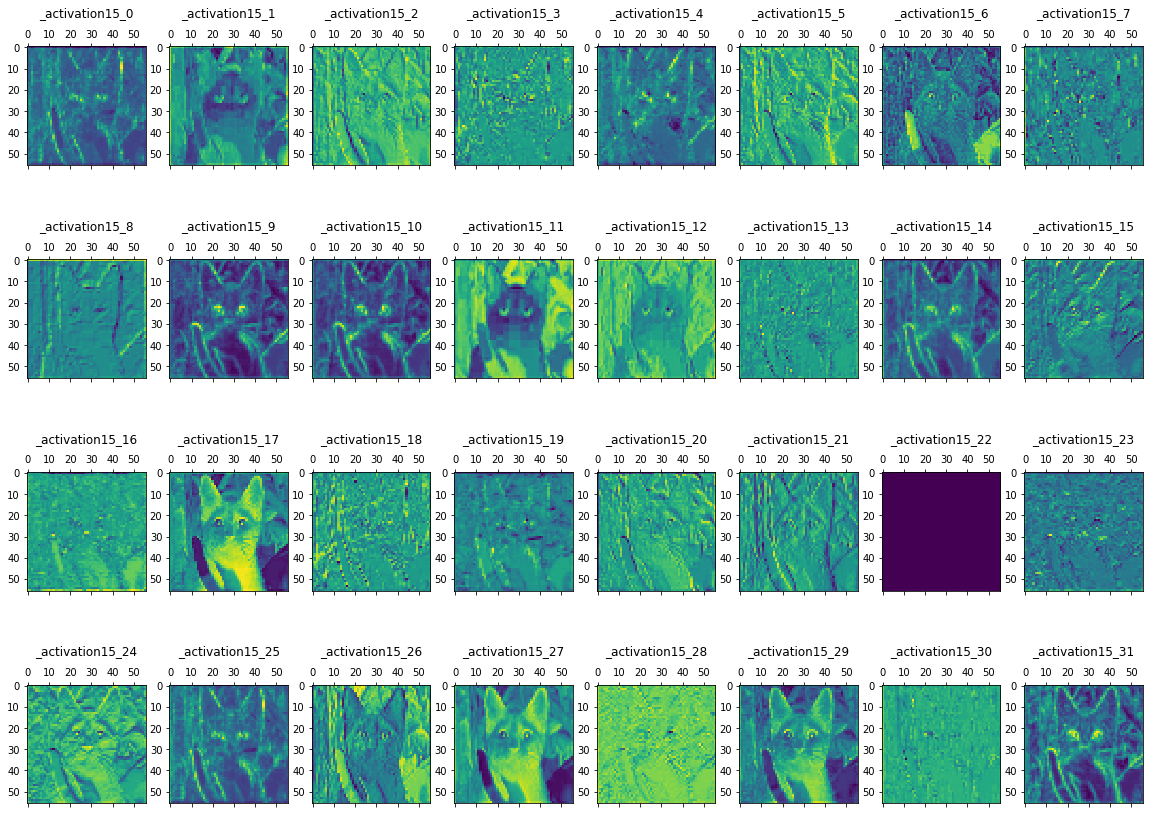

In [110]:
photo_path=fnames[3]
layer_count=15
activations=activation_model.predict(preprocess_img(photo_path))
activation_layer=activations[layer_count]
txt='activation'+str(layer_count)
plot_activation_matrix(photo_path,activation_layer,txt)

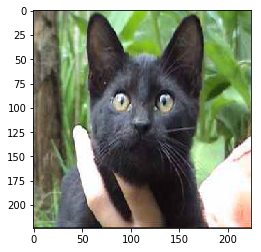

256


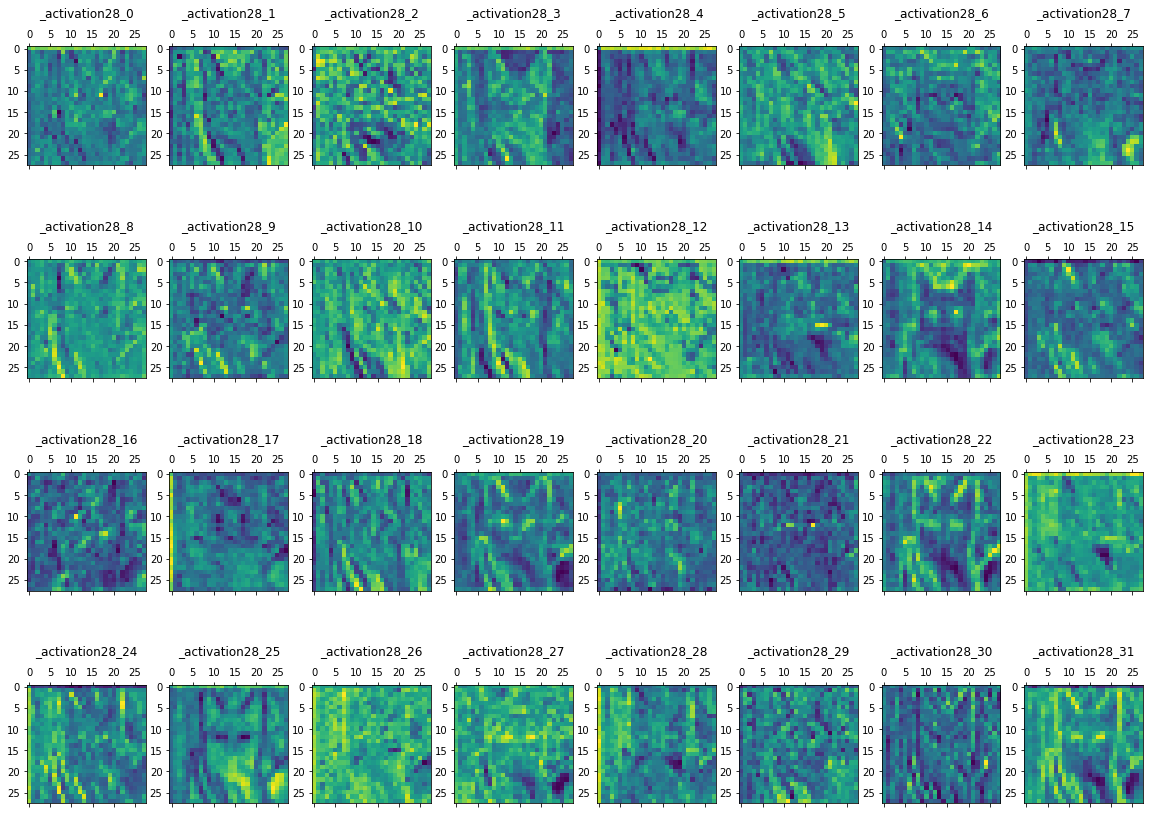

In [108]:
photo_path=fnames[3]
layer_count=28
activations=activation_model.predict(preprocess_img(photo_path))
activation_layer=activations[layer_count]
txt='activation'+str(layer_count)
plot_activation_matrix(photo_path,activation_layer,txt)

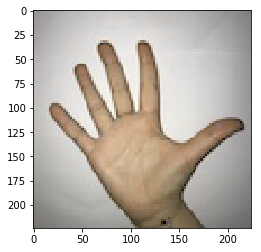

32


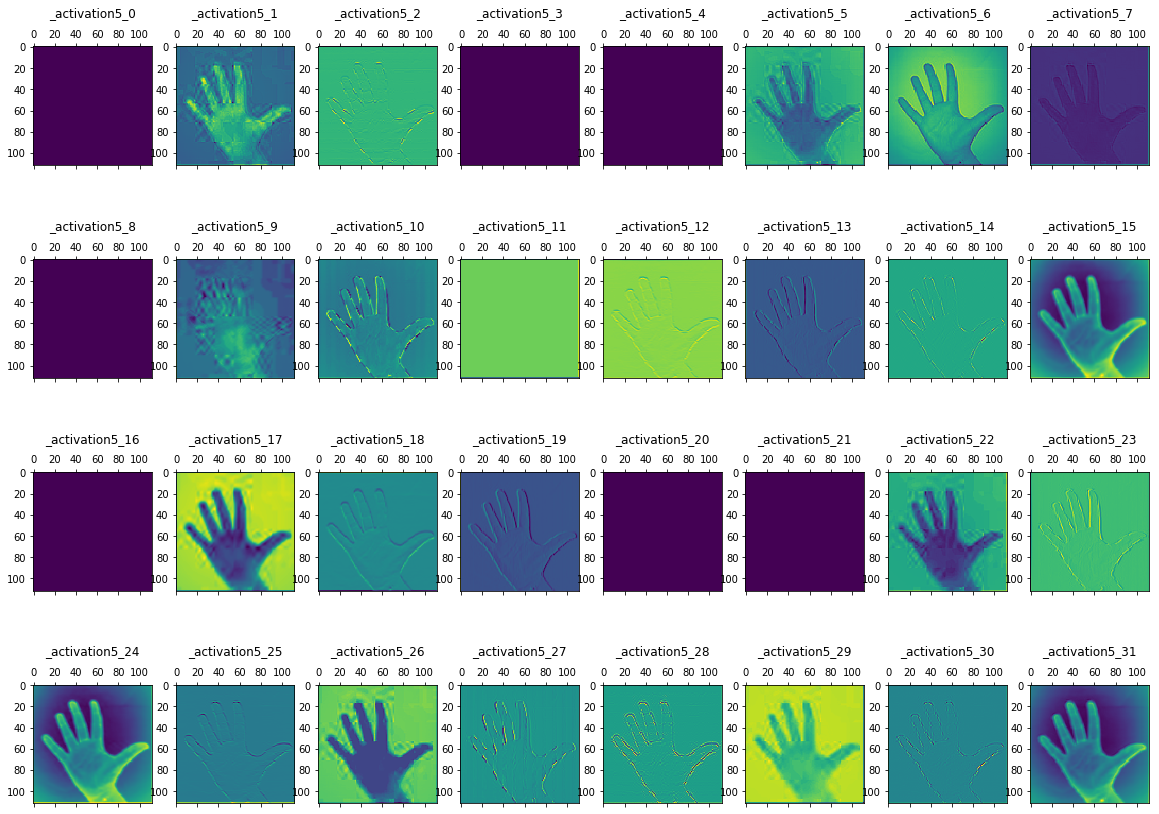

In [74]:
photo_path=fnames[12]
layer_count=5
activations=activation_model.predict(preprocess_img(photo_path))
activation_layer=activations[layer_count]
txt='activation'+str(layer_count)
plot_activation_matrix(photo_path,activation_layer,txt)

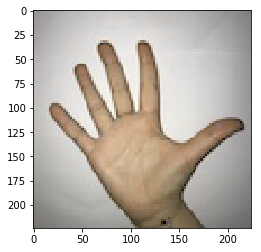

256


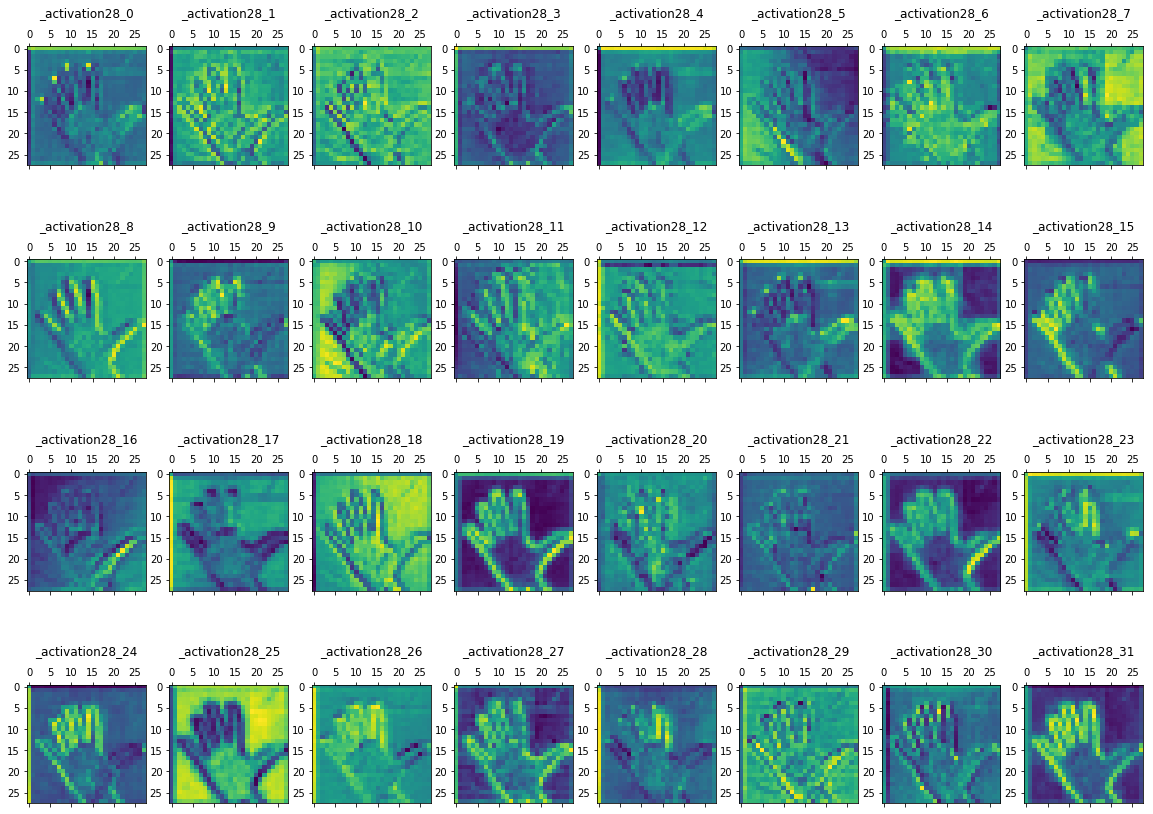

In [106]:
photo_path=fnames[12]
layer_count=28
activations=activation_model.predict(preprocess_img(photo_path))
activation_layer=activations[layer_count]
txt='activation'+str(layer_count)
plot_activation_matrix(photo_path,activation_layer,txt)

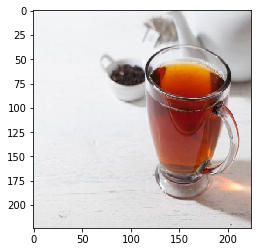

256


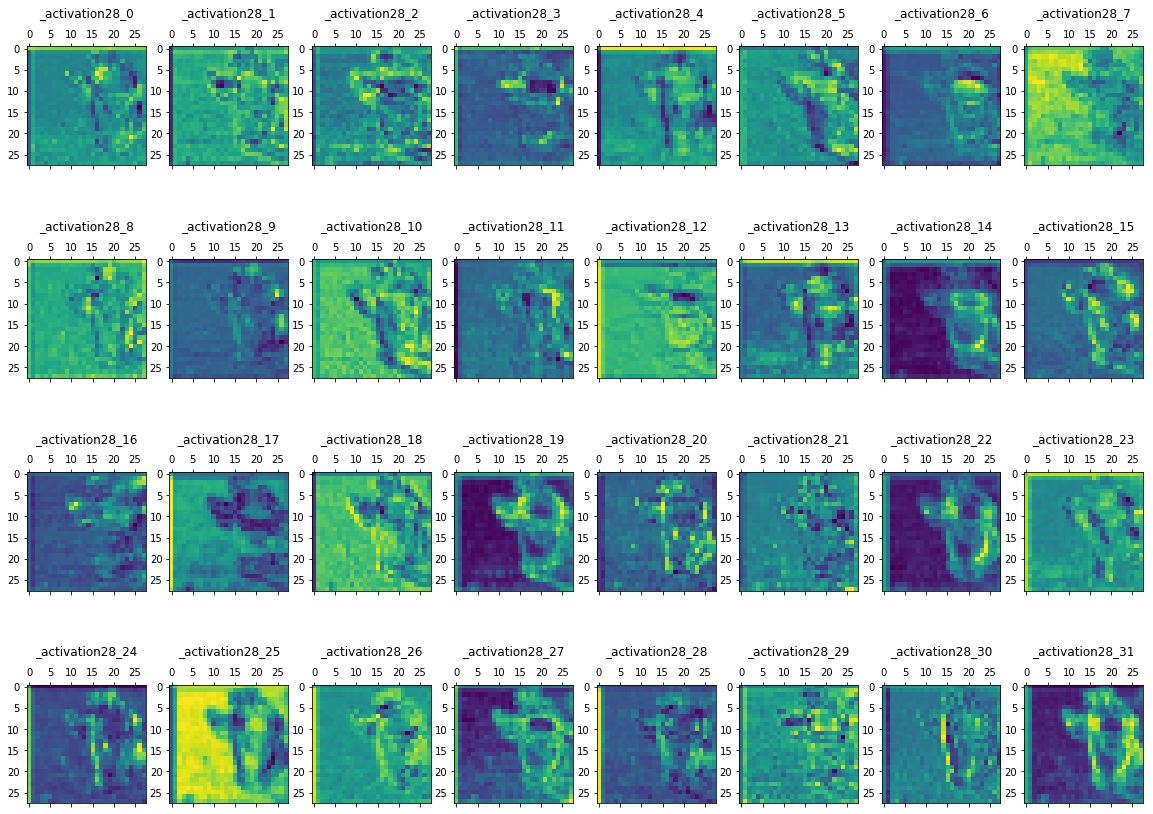

In [105]:
photo_path=fnames[7]
layer_count=28
activations=activation_model.predict(preprocess_img(photo_path))
activation_layer=activations[layer_count]
txt='activation'+str(layer_count)
plot_activation_matrix(photo_path,activation_layer,txt)

In [11]:
for layer in activation_model.layers:
    print(layer.name) 

input_1
conv1_pad
conv1
conv1_bn
conv1_relu
conv_pad_1
conv_dw_1
conv_dw_1_bn
conv_dw_1_relu
conv_pw_1
conv_pw_1_bn
conv_pw_1_relu
conv_pad_2
conv_dw_2
conv_dw_2_bn
conv_dw_2_relu
conv_pw_2
conv_pw_2_bn
conv_pw_2_relu
conv_pad_3
conv_dw_3
conv_dw_3_bn
conv_dw_3_relu
conv_pw_3
conv_pw_3_bn
conv_pw_3_relu
conv_pad_4
conv_dw_4
conv_dw_4_bn
conv_dw_4_relu
conv_pw_4


In [14]:
activation_model.get_layer(name='conv1') #same

In [15]:
activation_model.layers[2] #same

In [16]:
conv2d_1_layer=activation_model.layers[2]

In [18]:
conv2d_1_layer_weight=conv2d_1_layer.get_weights()

In [22]:
np.array(conv2d_1_layer_weight).shape  #batch size (1)* 3*3 (filter ) * 3 (color channel) * 32 (output channel)

(1, 3, 3, 3, 32)

(1, 3, 3, 3, 32)
32
32


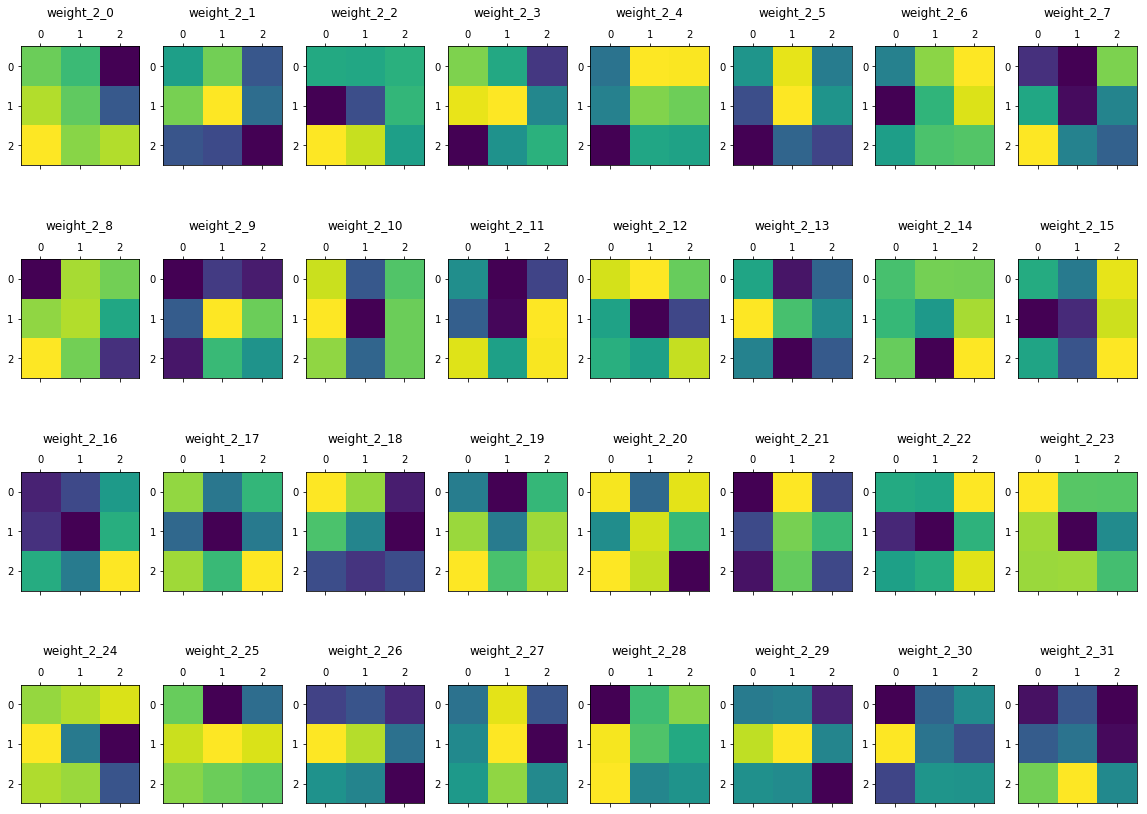

In [32]:
def plot_activation_weights(activation_layer_weight,txt):
    
    activation_layer_name=str(str(txt)+'_')
    activation_layer_size=activation_layer_weight.shape[4] #[4]
    print(activation_layer_size)

    #plt.imshow(image.load_img(photo_path,target_size=(224,224)))
    #plt.show()

    plt.figure(figsize=(20,15))
    for i in range(32): #activation_layer_size


        ax=plt.subplot(4,8,i+1,xticks=[],yticks=[])  # just up to 32 filter for each layer,activation_layer_size//8
        #visualize(imgs[i],ax)
        ax.matshow(activation_layer_weight[0,:,:,0,i],cmap='viridis')  #color channel batch filter weight*height * color channel * output chanel
        label=activation_layer_name+str(i)
        #print(label)
        position_=ax.set_title(label) 
        position_.set_position([0.5,1.2])
        #print(i)
    plt.show()
    

layer_count=2
activation_layer=activation_model.layers[layer_count]
activation_layer_weight=np.array(activation_layer.get_weights())
print(activation_layer_weight.shape)
print(activation_layer_weight.shape[4])
txt='weight_'+str(layer_count)
plot_activation_weights(activation_layer_weight,txt)    


In [1]:
import keras
keras.__version__

/home/ania/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.1.6'